In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('NewFactOrder.csv')

In [3]:
print(df.shape)
df

(525854, 13)


,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,20180121,1.0
1,94940600,12,12030,Blue,DENIM,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,NaN,20180121,1.0
2,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,20180121,1.0
3,94940800,1,8501,offwhite,DRESSES LS,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,20180121,1.0
4,94940800,2,24256,offwhite,LEGGINGS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,NaN,20180121,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525849,115941200,1,41610,green,BEANIES,44/46,HATS,Main,XHATS,1 BABY,NaN,20210101,1.0
525850,115941300,1,47710,Beige,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,20210101,1.0
525851,115941300,2,7781,blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,NaN,20210101,1.0
525852,115941300,3,10311,Black,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,20210101,1.0


In [4]:
df['DateOrderedKey'] = pd.to_datetime(df['DateOrderedKey'], format='%Y%m%d')


In [5]:
df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,2018-01-21,1.0
1,94940600,12,12030,Blue,DENIM,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,NaN,2018-01-21,1.0
2,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,2018-01-21,1.0
3,94940800,1,8501,offwhite,DRESSES LS,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,2018-01-21,1.0
4,94940800,2,24256,offwhite,LEGGINGS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,NaN,2018-01-21,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525849,115941200,1,41610,green,BEANIES,44/46,HATS,Main,XHATS,1 BABY,NaN,2021-01-01,1.0
525850,115941300,1,47710,Beige,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,2021-01-01,1.0
525851,115941300,2,7781,blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,NaN,2021-01-01,1.0
525852,115941300,3,10311,Black,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,2021-01-01,1.0


In [6]:
df.set_index('DateOrderedKey', inplace=True)

In [7]:
df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,QuantityOrdered
DateOrderedKey,,,,,,,,,,,,
2018-01-21,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,1.0
2018-01-21,94940600,12,12030,Blue,DENIM,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,NaN,1.0
2018-01-21,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,1.0
2018-01-21,94940800,1,8501,offwhite,DRESSES LS,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,1.0
2018-01-21,94940800,2,24256,offwhite,LEGGINGS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,115941200,1,41610,green,BEANIES,44/46,HATS,Main,XHATS,1 BABY,NaN,1.0
2021-01-01,115941300,1,47710,Beige,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,1.0
2021-01-01,115941300,2,7781,blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,NaN,1.0


In [8]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum()

In [9]:
monthly_df

DateOrderedKey  ArticleGroupName
2018-01-31      ACCESSORIES          256.0
                BODY AND ONESIE     1074.0
                BOTTOMS             6144.0
                DRESSES             2958.0
                HATS                1133.0
                                     ...  
2021-01-31      DRESSES               23.0
                HATS                  37.0
                OUTERWEAR            139.0
                SWIMWEAR               4.0
                TOPS                  96.0
Name: QuantityOrdered, Length: 418, dtype: float64

In [10]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum().unstack()

In [11]:
monthly_df

ArticleGroupName,ACCESSORIES,BODY AND ONESIE,BOTTOMS,DRESSES,Discount,ECOM return cost,Giftwrapping,HATS,HOME,OUTERWEAR,SWIMWEAR,Shipment,Stuff,TOPS,Övriga intäkter
DateOrderedKey,,,,,,,,,,,,,,,
2018-01-31,256.0,1074.0,6144.0,2958.0,NaN,NaN,NaN,1133.0,82.0,406.0,16.0,2.0,NaN,4973.0,19.0
2018-02-28,283.0,775.0,4118.0,2184.0,NaN,NaN,NaN,1562.0,71.0,383.0,11.0,1.0,NaN,4108.0,1.0
2018-03-31,247.0,402.0,1336.0,513.0,NaN,NaN,NaN,531.0,88.0,612.0,451.0,2.0,66.0,2390.0,22.0
2018-04-30,470.0,242.0,631.0,194.0,NaN,NaN,NaN,504.0,42.0,413.0,220.0,2.0,12.0,1125.0,11.0
2018-05-31,297.0,298.0,1106.0,468.0,NaN,NaN,NaN,831.0,214.0,366.0,244.0,NaN,11.0,2008.0,NaN
2018-06-30,225.0,1000.0,2978.0,1260.0,NaN,NaN,NaN,801.0,133.0,298.0,140.0,1.0,11.0,4786.0,NaN
2018-07-31,305.0,1299.0,3908.0,1994.0,NaN,NaN,NaN,1274.0,79.0,652.0,642.0,NaN,19.0,5944.0,17.0
2018-08-31,595.0,1136.0,3944.0,1823.0,NaN,NaN,NaN,1676.0,110.0,1228.0,320.0,NaN,22.0,5045.0,4.0
2018-09-30,733.0,230.0,761.0,180.0,NaN,1.0,NaN,558.0,3816.0,644.0,38.0,1.0,13.0,1604.0,8.0


In [12]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum().unstack().fillna(0)

In [13]:
monthly_df.columns[[4,5,11,12,14]]
monthly_df.drop(monthly_df.columns[[4,5,11,12,14]], axis=1, inplace=True)

In [14]:
monthly_df

ArticleGroupName,ACCESSORIES,BODY AND ONESIE,BOTTOMS,DRESSES,Giftwrapping,HATS,HOME,OUTERWEAR,SWIMWEAR,TOPS
DateOrderedKey,,,,,,,,,,
2018-01-31,256.0,1074.0,6144.0,2958.0,0.0,1133.0,82.0,406.0,16.0,4973.0
2018-02-28,283.0,775.0,4118.0,2184.0,0.0,1562.0,71.0,383.0,11.0,4108.0
2018-03-31,247.0,402.0,1336.0,513.0,0.0,531.0,88.0,612.0,451.0,2390.0
2018-04-30,470.0,242.0,631.0,194.0,0.0,504.0,42.0,413.0,220.0,1125.0
2018-05-31,297.0,298.0,1106.0,468.0,0.0,831.0,214.0,366.0,244.0,2008.0
2018-06-30,225.0,1000.0,2978.0,1260.0,0.0,801.0,133.0,298.0,140.0,4786.0
2018-07-31,305.0,1299.0,3908.0,1994.0,0.0,1274.0,79.0,652.0,642.0,5944.0
2018-08-31,595.0,1136.0,3944.0,1823.0,0.0,1676.0,110.0,1228.0,320.0,5045.0
2018-09-30,733.0,230.0,761.0,180.0,0.0,558.0,3816.0,644.0,38.0,1604.0


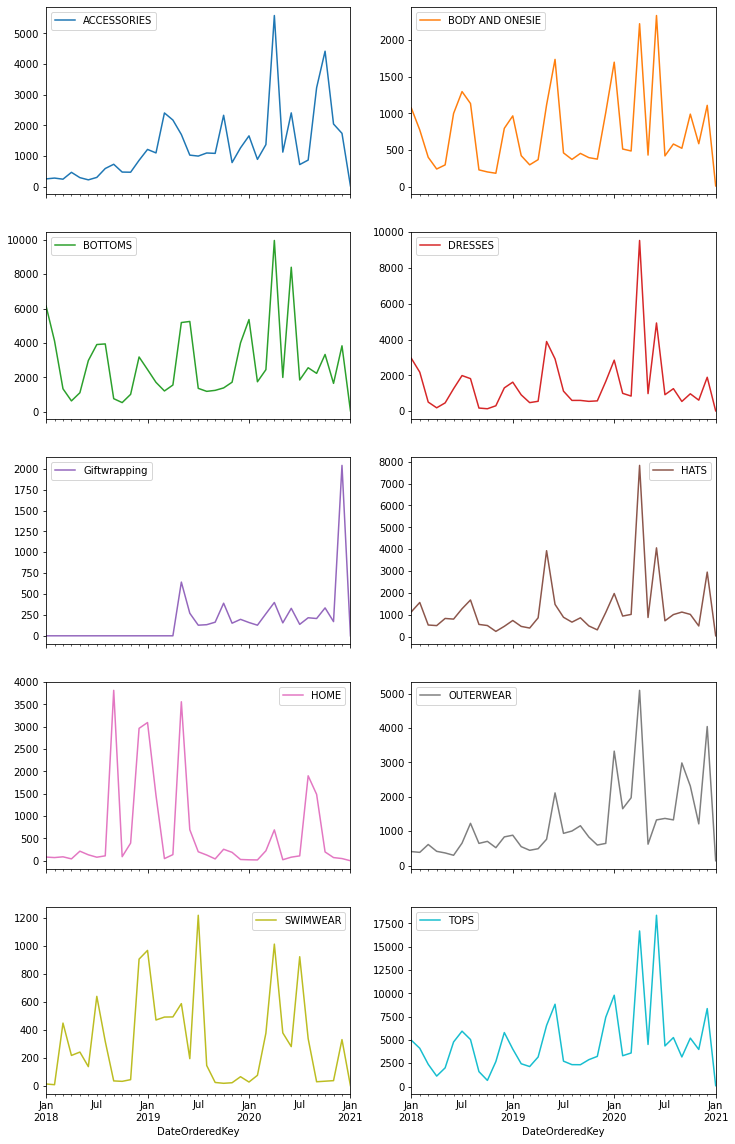

In [15]:
monthly_df.plot(subplots=True, figsize=(12, 20), layout=(-1, 2))
plt.show()



ACCESSORIES
BODY AND ONESIE
BOTTOMS
DRESSES
Giftwrapping
HATS
HOME
OUTERWEAR
SWIMWEAR
TOPS


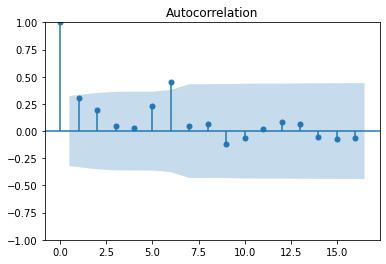

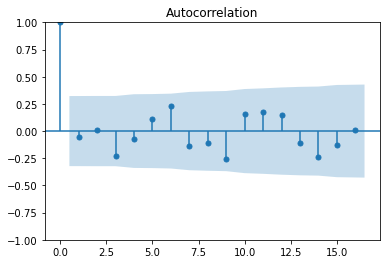

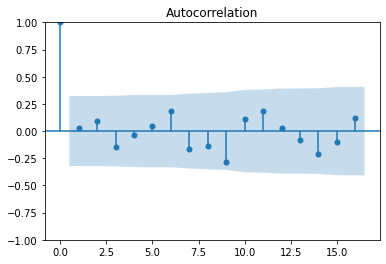

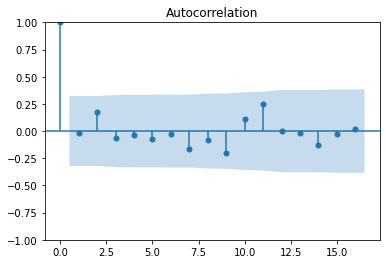

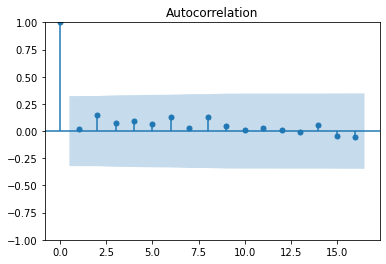

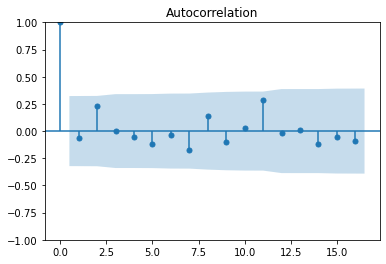

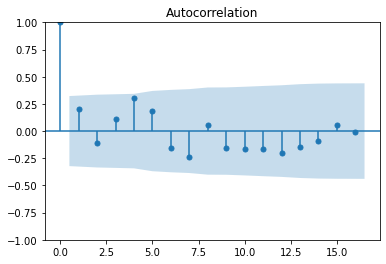

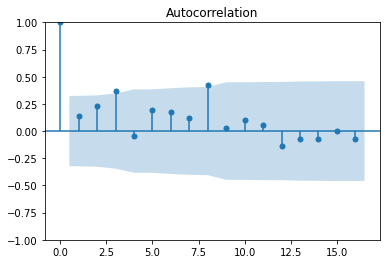

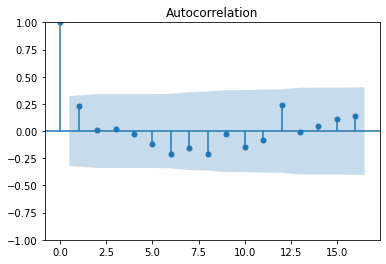

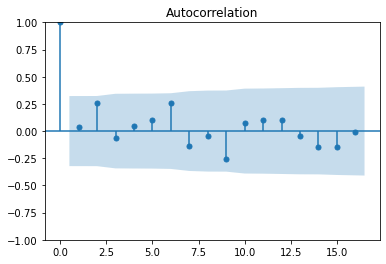

In [16]:
from statsmodels.graphics.tsaplots import plot_acf


for group in monthly_df.columns:
    group_df = monthly_df[[group]].resample('M').sum()
    print(group)
    plot_acf(group_df.values)

ACCESSORIES
BODY AND ONESIE
BOTTOMS
DRESSES
Giftwrapping
HATS
HOME
OUTERWEAR
SWIMWEAR
TOPS


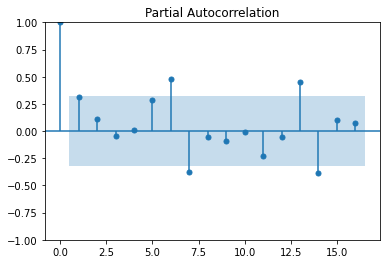

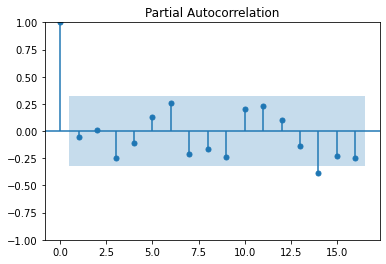

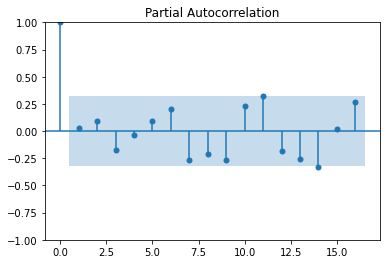

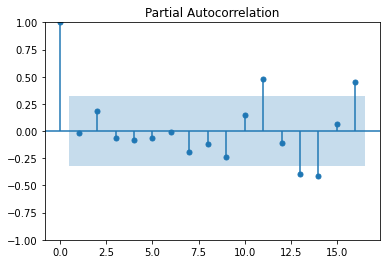

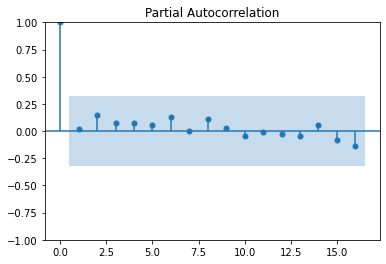

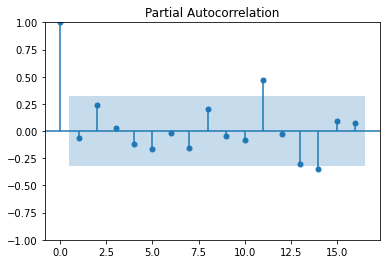

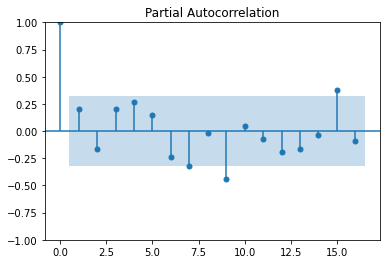

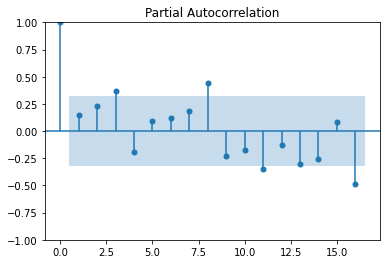

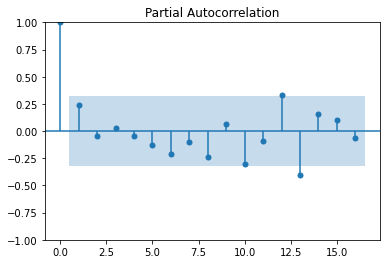

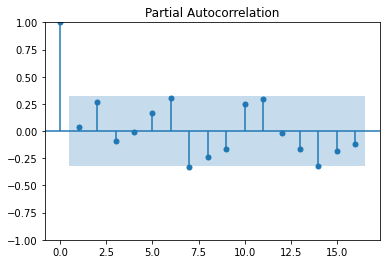

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf


for group in monthly_df.columns:
    group_df = monthly_df[[group]].resample('M').sum()
    print(group)
    plot_pacf(group_df.values)

In [18]:
# Create a summary dataframe with the predicted values for each article group
summary_df = pd.DataFrame(index=monthly_df.columns, columns=['February', 'March', 'April', 'May', 'June','july',
                                                             'August' ,'September', 'October', 'November', 'December'])
for group in monthly_df.columns:
    group_df = monthly_df[[group]].resample('M').sum()
    train_data = group_df.loc[:'2020-01-31']
    test_data = group_df.loc['2020-02-29':]
    model = ARIMA(train_data, order=(1, 0, 2))
    fit_model = model.fit()
    steps = 365
    preds = fit_model.forecast(steps, exog=None, alpha=0.05)
    summary_df.loc[group] = [int(preds[0]), int(preds[1]), int(preds[2]), int(preds[3]), int(preds[4]),
                             int(preds[5]), int(preds[6]), int(preds[7]), int(preds[8]), int(preds[9]), int(preds[10])]

# Print the summary dataframe
print(summary_df)


                 February March April   May  June  july August September  \
ArticleGroupName                                                           
ACCESSORIES          1381  1301  1241  1191  1151  1117   1090      1067   
BODY AND ONESIE       704   199   486   596   637   654    660       662   
BOTTOMS              2575  1271  1816  2090  2229  2299   2334      2352   
DRESSES              1675   647   885  1024  1105  1153   1181      1197   
Giftwrapping          144   135   128   122   116   112    108       105   
HATS                 1026   659   774   843   885   911    926       936   
HOME                  656   776   710   718   717   717    717       717   
OUTERWEAR            1382   638   996   723   931   773    893       802   
SWIMWEAR              247   292   318   307   312   310    311       310   
TOPS                 4889  2355  2771  3074  3295  3457   3575      3661   

                 October November December  
ArticleGroupName                          

In [19]:
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   TOPS   No. Observations:                   25
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -223.156
Date:                Fri, 02 Jun 2023   AIC                            456.311
Time:                        12:20:46   BIC                            462.406
Sample:                    01-31-2018   HQIC                           458.002
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3892.5849    242.580     16.047      0.000    3417.137    4368.033
ar.L1          0.7294      0.297      2.455      0.014       0.147       1.312
ma.L1         -0.3217      0.486     -0.662      0.5

In [20]:
# Fit the best model and make predictions
predicted_values = pd.DataFrame()
for column in monthly_df.columns:
    model = ARIMA(monthly_df[column], order=(1,0,2))
    model_fit = model.fit()
    predicted_values[column] = model_fit.predict(start=monthly_df.index[0], end=monthly_df.index[-1])

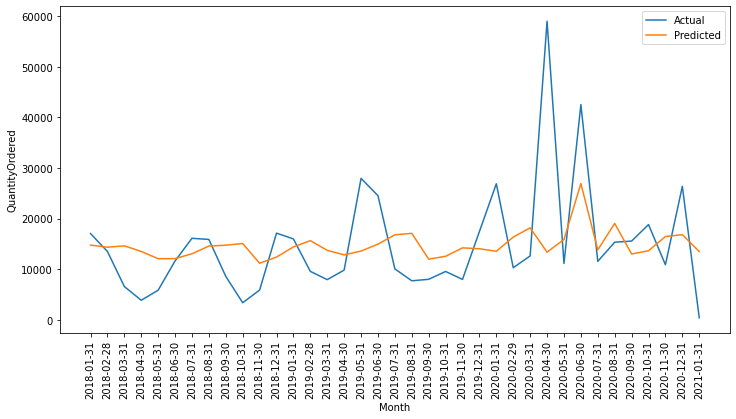

In [21]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index.astype(str), monthly_df.sum(axis=1), label='Actual')
plt.plot(monthly_df.index.astype(str), predicted_values.sum(axis=1), label='Predicted')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('QuantityOrdered')
plt.legend()
plt.show()

In [22]:
#Evaluation using statistical methodes
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_values=[]
rmse_values=[]
mae_values=[]
ape_values=[]
for column in monthly_df.columns:
    mse = mean_squared_error(monthly_df[column], predicted_values[column])
    mse_values.append(mse)
    ape =np.abs(monthly_df[column], predicted_values[column])
    ape_values.append(ape)
    mae = mean_absolute_error(monthly_df[column], predicted_values[column])
    mae_values.append(mae)
avg_mse = np.mean(mse_values)
rmse = np.sqrt(avg_mse)
avg_ape=np.mean(ape_values)
avg_mape=np.mean(avg_ape)/len(monthly_df)
avg_mae=np.mean(mae_values)
mdape=np.median(ape_values)
print("The MAPE of Arima Model",avg_mape)
print("The MAE of Arima Model",avg_mae)
print("The MSE of Arima Model",avg_mse)
print("The RMSE of Arima Model",rmse)
print("The MDAPE of Arima Model",mdape)

The MAPE of Arima Model 39.666033601168735
The MAE of Arima Model 0.0
The MSE of Arima Model 2543526.4751222925
The RMSE of Arima Model 1594.8437149521242
The MDAPE of Arima Model 749.5


In [23]:
monthlycollection_df = df.groupby([pd.Grouper(freq='M'), 'Collection'])['QuantityOrdered'].sum().unstack().fillna(0)

In [24]:
monthlycollection_df

Collection,Base,Main,Pre,Special Collection
DateOrderedKey,,,,
2018-01-31,173.0,15863.0,288.0,739.0
2018-02-28,166.0,12435.0,235.0,661.0
2018-03-31,301.0,5918.0,352.0,89.0
2018-04-30,216.0,2623.0,290.0,737.0
2018-05-31,191.0,2665.0,2919.0,68.0
2018-06-30,124.0,8444.0,3022.0,43.0
2018-07-31,130.0,13755.0,2224.0,24.0
2018-08-31,128.0,13652.0,2083.0,40.0
2018-09-30,57.0,7889.0,262.0,379.0


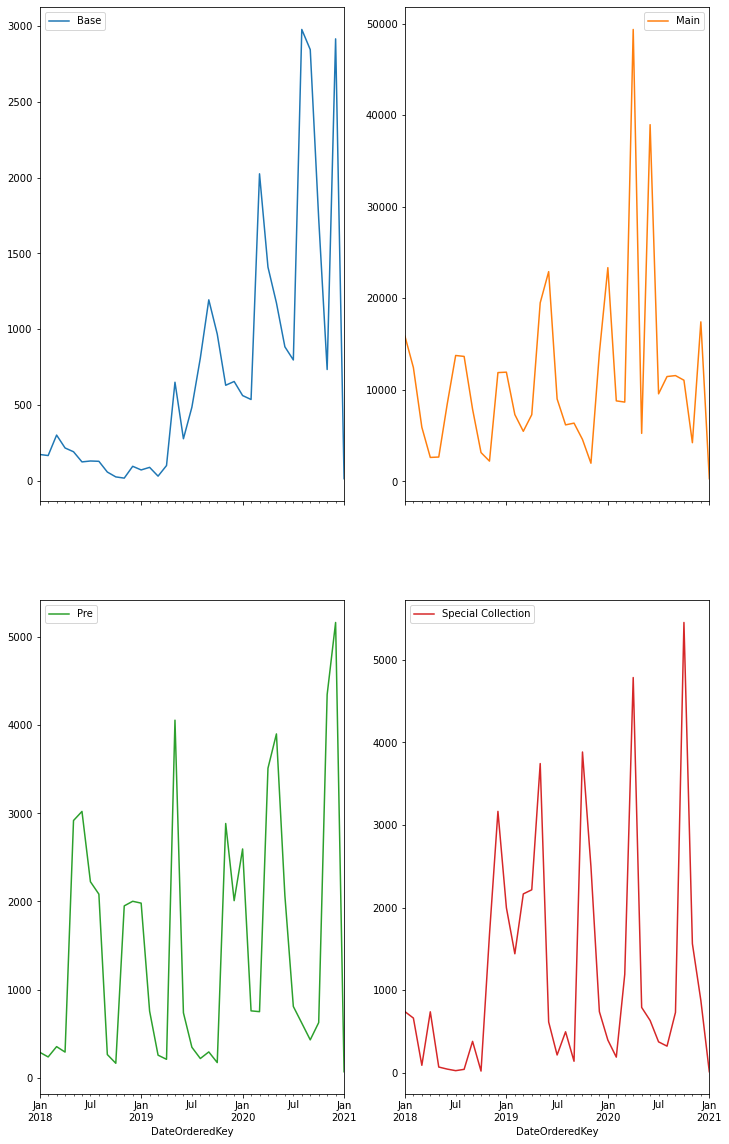

In [25]:
monthlycollection_df.plot(subplots=True, figsize=(12, 20), layout=(-1, 2))
plt.show()

In [26]:
# Create a summary dataframe with the predicted values for each Collection
summary_df = pd.DataFrame(index=monthlycollection_df.columns, columns=['February', 'March', 'April', 'May', 'June','July'])

for group in monthlycollection_df.columns:
    group_df = monthlycollection_df[[group]].resample('M').sum()
    train_data = group_df.loc[:'2020-01-31']
    test_data = group_df.loc['2020-02-29':]
    model = ARIMA(train_data, order=(1, 0, 2))
    fit_model = model.fit()
    steps = 365
    preds = fit_model.forecast(steps, exog=None, alpha=0.05)

    summary_df.loc[group] = [int(preds[0]), int(preds[1]), int(preds[2]), int(preds[3]), int(preds[4]), int(preds[5])]

# Print the summary dataframe
print(summary_df)

                   February March April   May  June  July
Collection                                               
Base                    513   481   452   429   410   394
Main                  11385  5230  6790  7762  8366  8742
Pre                    1473  1014  1146  1219  1260  1283
Special Collection      721  1214  1060  1160  1095  1137


In [27]:
monthlyBabyJunior_df = df.groupby([pd.Grouper(freq='M'), 'BabyJunior'])['QuantityOrdered'].sum().unstack().fillna(0)

In [28]:
monthlyBabyJunior_df

BabyJunior,1 BABY,2 TODDLER,3 KIDS,4 JUNIOR,5 ADULT,6 ONESIZE,HOME,SHOES,X
DateOrderedKey,,,,,,,,,
2018-01-31,2499.0,7582.0,5508.0,1189.0,0.0,98.0,5.0,15.0,2.0
2018-02-28,2035.0,5730.0,4528.0,952.0,0.0,118.0,5.0,30.0,3.0
2018-03-31,905.0,2599.0,2397.0,430.0,0.0,178.0,7.0,28.0,0.0
2018-04-30,525.0,1423.0,1277.0,230.0,0.0,289.0,4.0,31.0,5.0
2018-05-31,600.0,2176.0,2227.0,442.0,0.0,222.0,84.0,18.0,1.0
2018-06-30,1759.0,4560.0,4105.0,929.0,0.0,148.0,66.0,14.0,2.0
2018-07-31,2251.0,5807.0,5823.0,1884.0,0.0,256.0,31.0,15.0,25.0
2018-08-31,2618.0,5248.0,5416.0,2082.0,0.0,408.0,44.0,10.0,18.0
2018-09-30,536.0,1680.0,1713.0,478.0,0.0,1248.0,2719.0,0.0,23.0


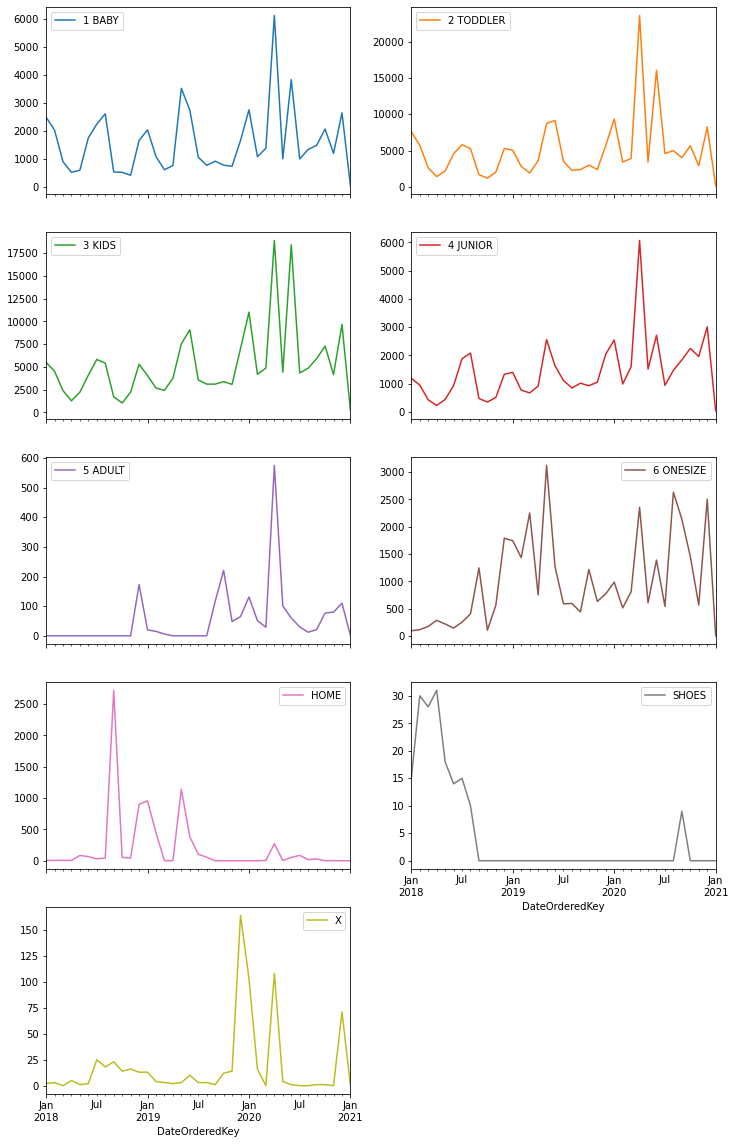

In [29]:
monthlyBabyJunior_df.plot(subplots=True, figsize=(12, 20), layout=(-1, 2))
plt.show()

In [30]:
# Create a summary dataframe with the predicted values for each Collection
summaryBabyJunior_df = pd.DataFrame(index=monthlyBabyJunior_df.columns, columns=[ 'February', 'March', 'April', 'May', 'June','July'])

for group in monthlyBabyJunior_df.columns:
    group_df = monthlyBabyJunior_df[[group]].resample('M').sum()
    train_data = group_df.loc[:'2020-01-31']
    test_data = group_df.loc['2020-02-29':]
    model = ARIMA(train_data, order=(1, 1, 1))
    fit_model = model.fit()
    steps = 365
    preds = fit_model.forecast(steps, exog=None, alpha=0.05)

    summaryBabyJunior_df.loc[group] = [int(preds[0]), int(preds[1]), int(preds[2]), int(preds[3]), int(preds[4]), int(preds[5])]

# Print the summary dataframe
print(summaryBabyJunior_df)

           February  March  April    May   June   July
BabyJunior                                            
1 BABY         1947   1636   1517   1471   1454   1447
2 TODDLER      9662   9581   9601   9596   9597   9597
3 KIDS        11681  11588  11601  11600  11600  11600
4 JUNIOR       1982   1697   1552   1478   1441   1422
5 ADULT          92     83     81     80     80     80
6 ONESIZE       836    880    867    871    870    870
HOME            267    277    278    278    278    278
SHOES             0      0      0      0      0      0
X               148    112    141    117    136    121


In [31]:
monthlyArticleGenre_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGenre'])['QuantityOrdered'].sum().unstack().fillna(0)

In [32]:
monthlyArticleGenre_df

ArticleGenre,BABY BOOTS,BABY KIT,BAGS,BATH,BEANIE BABY,BEANIES,BEDDINGS,BODY LS,BODY SS,BODY WOVEN,...,TOP WCT,TROUSERS JERSEY,TROUSERS PADDED,TROUSERS UNPADDED,TROUSERS WCT,TROUSERS WOVEN,UNDERWEAR,UV SUITS,UV TOPS,Övrigt
DateOrderedKey,,,,,,,,,,,,,,,,,,,,,
2018-01-31,30.0,2.0,9.0,0.0,0.0,1033.0,61.0,436.0,193.0,0.0,...,0.0,43.0,13.0,4.0,0.0,76.0,0.0,0.0,0.0,21.0
2018-02-28,50.0,1.0,38.0,0.0,0.0,1185.0,47.0,264.0,197.0,10.0,...,0.0,152.0,21.0,2.0,0.0,58.0,0.0,1.0,1.0,2.0
2018-03-31,10.0,0.0,48.0,0.0,0.0,271.0,71.0,117.0,116.0,7.0,...,0.0,48.0,0.0,18.0,0.0,12.0,0.0,43.0,61.0,90.0
2018-04-30,11.0,2.0,209.0,0.0,0.0,235.0,26.0,57.0,54.0,2.0,...,0.0,11.0,0.0,18.0,0.0,8.0,0.0,46.0,16.0,25.0
2018-05-31,8.0,4.0,55.0,0.0,0.0,119.0,194.0,41.0,108.0,3.0,...,0.0,12.0,0.0,14.0,0.0,16.0,0.0,53.0,41.0,11.0
2018-06-30,16.0,5.0,46.0,0.0,0.0,341.0,120.0,274.0,243.0,4.0,...,0.0,32.0,0.0,3.0,0.0,42.0,0.0,38.0,16.0,12.0
2018-07-31,9.0,1.0,156.0,0.0,0.0,571.0,68.0,249.0,353.0,1.0,...,0.0,6.0,0.0,18.0,0.0,52.0,0.0,10.0,7.0,36.0
2018-08-31,23.0,0.0,253.0,0.0,0.0,1203.0,86.0,211.0,267.0,0.0,...,0.0,7.0,9.0,58.0,0.0,50.0,0.0,8.0,6.0,26.0
2018-09-30,34.0,0.0,99.0,0.0,0.0,396.0,3678.0,93.0,11.0,0.0,...,0.0,0.0,19.0,52.0,0.0,11.0,0.0,13.0,2.0,23.0


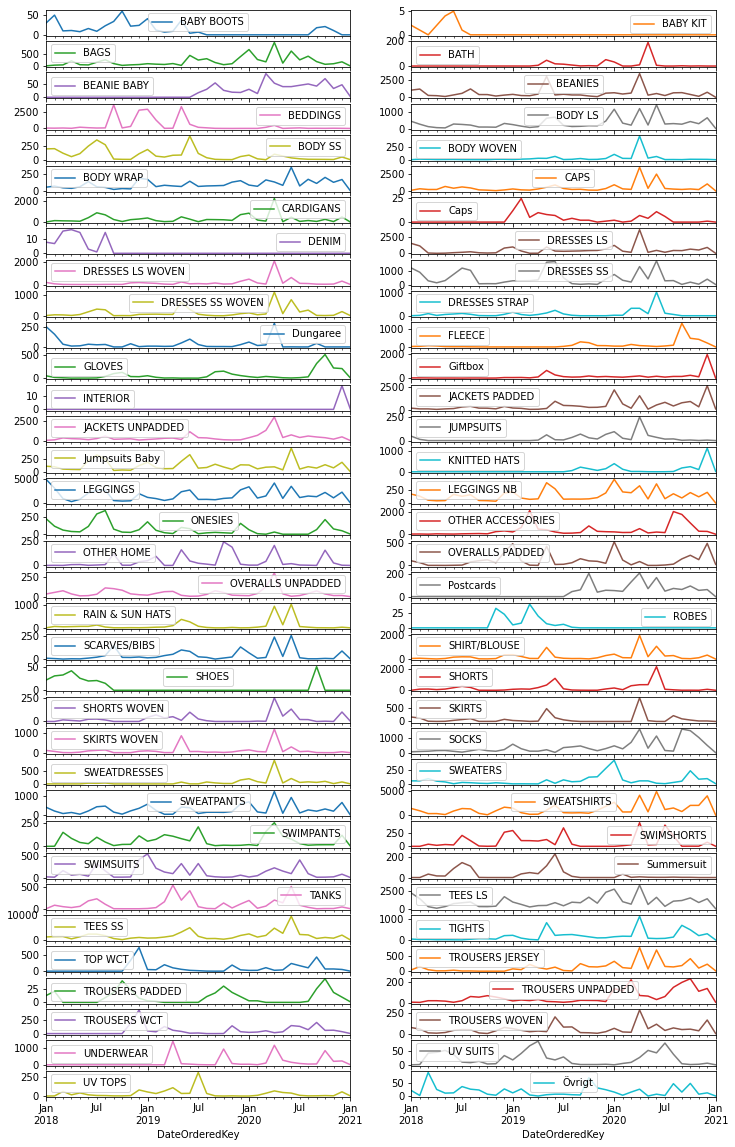

In [33]:
monthlyArticleGenre_df.plot(subplots=True, figsize=(12, 20), layout=(-1, 2))
plt.show()

In [34]:
# Create a summary dataframe with the predicted values for each Collection
summaryArticleGenre_df = pd.DataFrame(index=monthlyArticleGenre_df.columns, columns=['February', 'March', 'April', 'May', 'June', 'July'])

for group in monthlyArticleGenre_df.columns:
    group_df = monthlyArticleGenre_df[[group]].resample('M').sum()
    train_data = group_df.loc[:'2020-01-31']
    test_data = group_df.loc['2020-02-29':]
    model = ARIMA(train_data, order=(1, 1, 1))
    fit_model = model.fit()
    steps = 365
    preds = fit_model.forecast(steps, exog=None, alpha=0.05)

    summaryArticleGenre_df.loc[group] = [int(preds[0]), int(preds[1]), int(preds[2]), int(preds[3]), int(preds[4]), int(preds[5])]

# Print the summary dataframe
print(summaryArticleGenre_df)

               February March April  May June July
ArticleGenre                                      
BABY BOOTS            2     2     2    2    2    2
BABY KIT              0     0     0    0    0    0
BAGS                524   455   420  402  393  388
BATH                 24    21    20   20   19   19
BEANIE BABY          30    30    30   30   30   30
...                 ...   ...   ...  ...  ...  ...
TROUSERS WOVEN       59    64    60   63   61   62
UNDERWEAR           104   103   103  103  103  103
UV SUITS             -2     0    -2    0   -2    0
UV TOPS              31    35    36   36   36   36
Övrigt               19    19    19   19   19   19

[70 rows x 6 columns]
